> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Data No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [9]:
df = pd.read_csv ('Data_No_show_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.shape

(110527, 14)

In [11]:
df.describe ()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.drop(['AppointmentID', 'Scholarship', 'Neighbourhood', 'SMS_received'], axis=1, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,No


In [8]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,No


In [5]:
df.drop(['Neighbourhood'], axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [10]:
df.drop(['AppointmentDay'], axis=1, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,62,1,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,56,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,62,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,8,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,56,1,1,0,0,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
PatientId       110527 non-null float64
Gender          110527 non-null object
ScheduledDay    110527 non-null object
Age             110527 non-null int64
Hipertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handcap         110527 non-null int64
No-show         110527 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 7.6+ MB


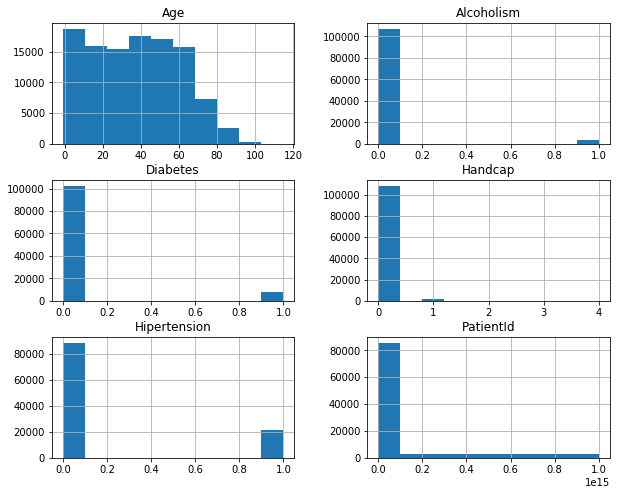

In [12]:
df.hist(figsize=(10, 8));

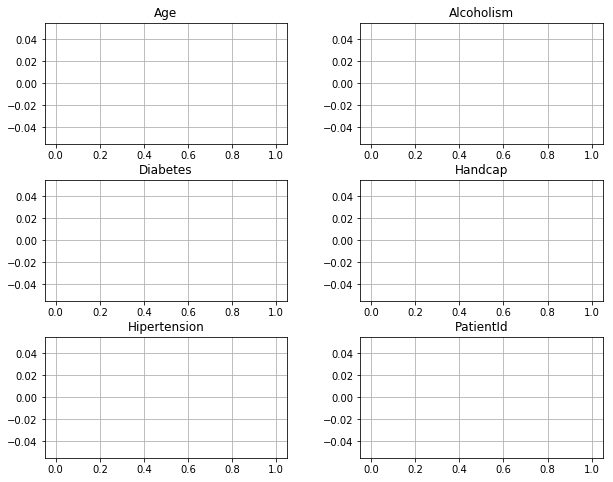

In [13]:
df[df.Age.isnull()].hist(figsize=(10,8));

In [18]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
PatientId       110527 non-null float64
Gender          110527 non-null object
ScheduledDay    110527 non-null object
Age             110527 non-null int64
Hipertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handcap         110527 non-null int64
No-show         110527 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 7.6+ MB


We use code hipertension to describe patient who has a hipertension disease
and use code freeH to describe patient who has a hipertension disease

In [31]:
hipertension = df.Hipertension == True
freeH = df.Hipertension == False

In [32]:
df.PatientId[hipertension]. mean()

144168562892905.59

In [40]:
df.PatientId[freeH]. mean()

148313920615653.75

To make comparison between Hipertension patient to who free Hipertension:
Choose hipertension code for peoples who have Hipertension 
Choose freeH code for peoples who have not

In [13]:

df.PatientId[hipertension].hist(alpha=0.5, bins=20, label='hipertension')
df.PatientId[freeH].hist(alpha=0.5, bins=20, label='freeH')

NameError: name 'hipertension' is not defined

We use code diabetes for patient who has a hipertension disease
and use code freeD for patient who has a hipertension disease

In [47]:
diabetes = df.Diabetes == True
freeD = df.Diabetes == False

In [48]:
df.PatientId[diabetes]. mean()

148973702749737.78

In [49]:
df.PatientId[freeD]. mean()

147381868899941.09

To make comparison between Diabetes patient to who free Diabetes:
Choose diabetes code for peoples who have Diabetes 
Choose freeD code for peoples who have not

In [1]:
df.PatientId[diabetes].hist(alpha=0.5, bins=20,label='diabetes')
df.PatientId[freeD].hist(alpha=0.5, bins=20, label='freeD')

NameError: name 'df' is not defined

We use code Alcoholism to describe patient who alcoholic peoples 
and use code freeA to describe patient who alcoholic peoples

In [11]:
alcoholism = df.Alcoholism == True
freeA = df.Alcoholism == False

In [13]:
df.PatientId[alcoholism]. mean()

163422242169281.47

In [14]:
df.PatientId[freeA]. mean()

146996939603459.5

To make comparison between Alcoholism to who free Alcoholism:
Choose alcoholism code for peoples who are alcoholic 
Choose freeA code for peoples who are not

In [2]:
df.PatientId[alcoholism].hist(alpha=0.5, bins=20, color='blue', label='alcoholism')
df.PatientId[freeA].hist(alpha=0.5, bins=20, color='orange', label='freeA')

NameError: name 'df' is not defined

We use code handcap and use code freeN 

In [15]:
handcap = df.Handcap == True
freeN = df.Handcap == False

In [16]:
df.PatientId[handcap]. mean()

132258819337186.86

In [17]:
df.PatientId[freeN]. mean()

147815271221404.5

To make comparison between Handcap patient to whom free from: Choose handcap code for peoples whom sufering from handcap, Choose freeN code for peoples whom have not

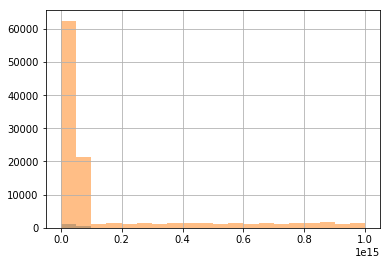

In [18]:
df.PatientId[handcap].hist(alpha=0.5, bins=20,label='handcap')
df.PatientId[freeN].hist(alpha=0.5, bins=20, label='freeN')

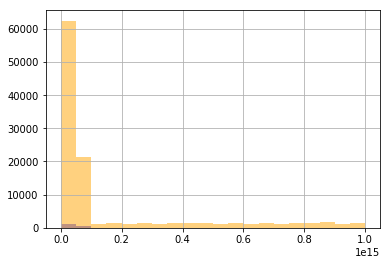

In [20]:
df.PatientId[handcap].hist(alpha=0.5, bins=20, color='blue', label='handcap')
df.PatientId[freeN].hist(alpha=0.5, bins=20, color='orange', label='freeN')

### What is the handling the age for both gender with every conditions

For knowing the amount of Male and Female

In [26]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

To compare between alcoholism and free from alcoholic / age

In [3]:
df.Age[Alcoholism].hist(alpha=0.5, bins=20, label='Alcoholism')
df.Age[freeA].hist(alpha=0.5, bins=20, label='freeA')
plt.legend();

NameError: name 'df' is not defined

To know the amount of each gender we can use (groupby) function

In [22]:
df.groupby('Gender')['Hipertension'].value_counts()

Gender  Hipertension
F       0               56501
        1               15339
M       0               32225
        1                6462
Name: Hipertension, dtype: int64

And to get the median, we use function (query) 

In [28]:
df.query('Gender == "F"')['Hipertension'].median(), df.query('Gender == "M"')['Hipertension'].median()

(0.0, 0.0)

For viewing it in bar chart, we use the nest code

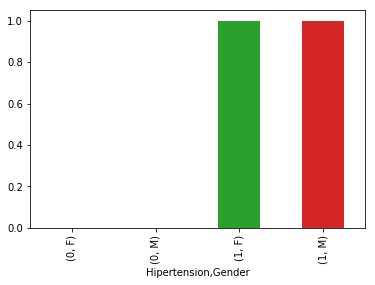

In [32]:
df.groupby(['Hipertension', 'Gender']).Hipertension.mean().plot (kind = 'bar');

In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0